DATASET is downloaded from Kaggle.

Let's have a close look, what information kaggle have provided.

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested.)

Content

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Tips

What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)

KNIME is a great tool (GUI) that can be used for this.
1 - File Reader (for csv) to linear correlation node and to interactive histogram for basic EDA.
2- File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:

$quality$ > 6.5 => "good"
TRUE => "bad"
3- Rule Engine Node output to input of Column Filter node to filter out your original 10point feature (this prevent leaking)
4- Column Filter Node output to input of Partitioning Node (your standard train/tes split, e.g. 75%/25%, choose 'random' or 'stratified')
5- Partitioning Node train data split output to input of Train data split to input Decision Tree Learner node and
6- Partitioning Node test data split output to input Decision Tree predictor Node
7- Decision Tree learner Node output to input Decision Tree Node input
8- Decision Tree output to input ROC Node.. (here you can evaluate your model base on AUC value)
Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

Acknowledgements

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (I am mistaken and the public license type disallowed me from doing so, I will take this down at first request. I am not the owner of this dataset.

Please include this citation if you plan to use this database:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Relevant publication

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df = pd.read_csv('/content/winequality-red.csv')

In [285]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [286]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [288]:
df.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [289]:
df.shape

(1599, 12)

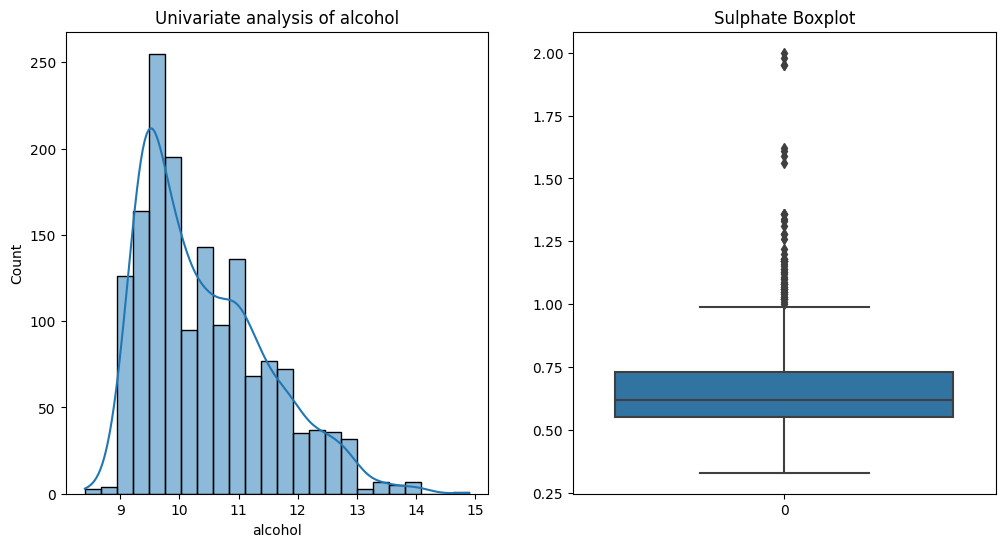

In [290]:
# Univariate analysis

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(df['alcohol'], kde = True)
plt.title('Univariate analysis of alcohol')

plt.subplot(1,2,2)
sns.boxplot(df['sulphates'])
plt.title('Sulphate Boxplot')
plt.show()

Let's apply on all columns and analyze them

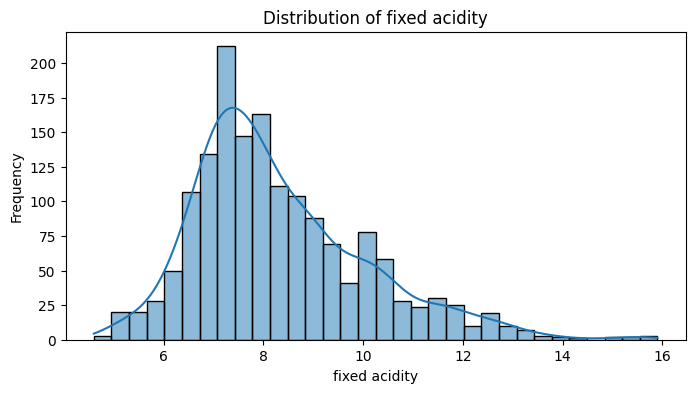

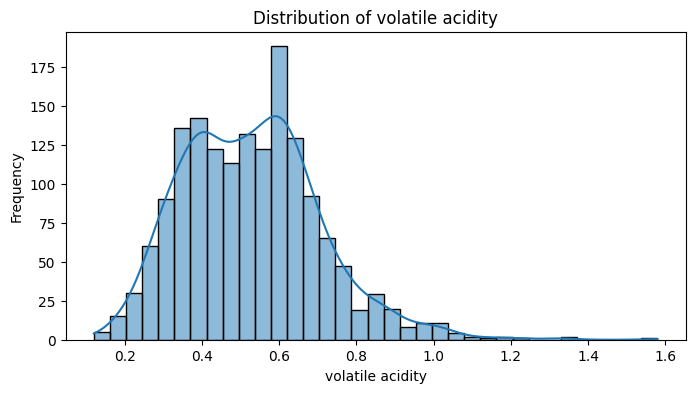

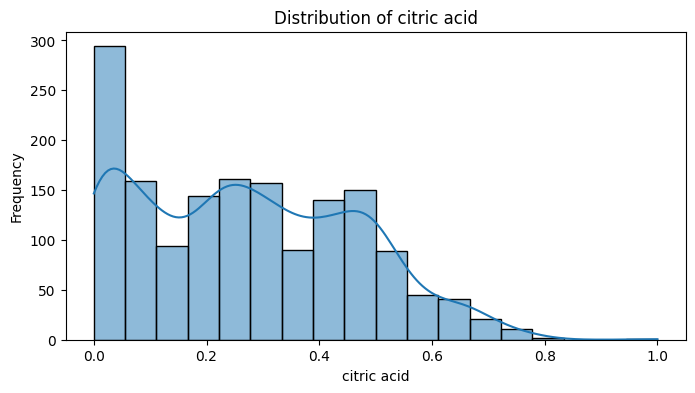

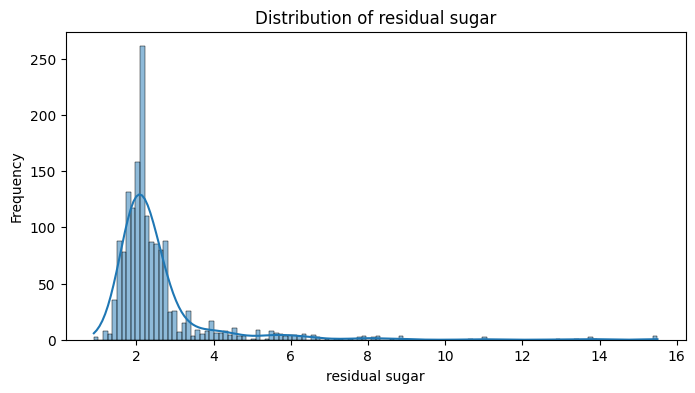

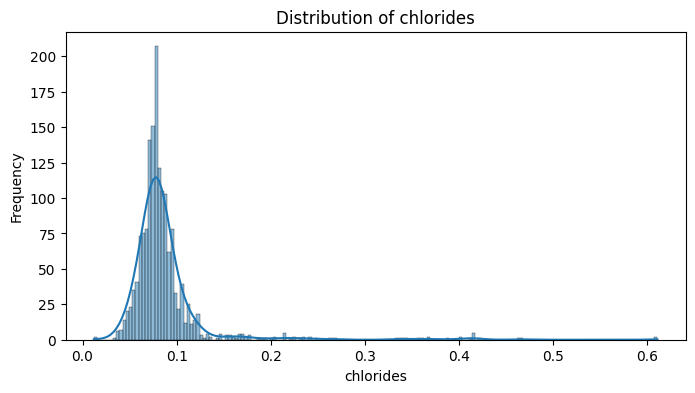

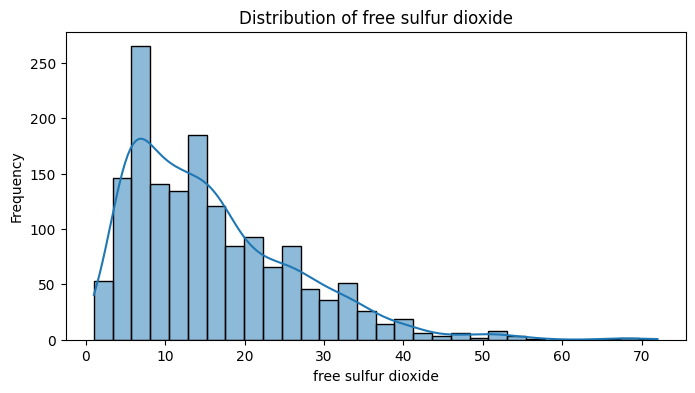

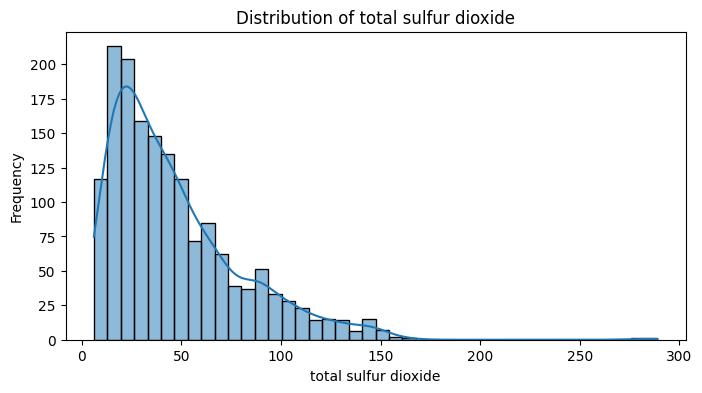

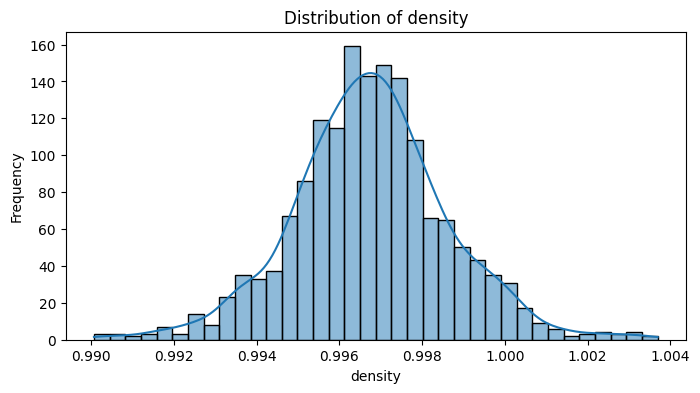

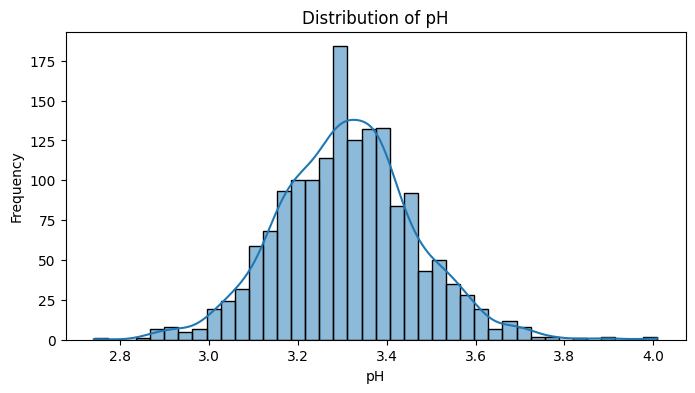

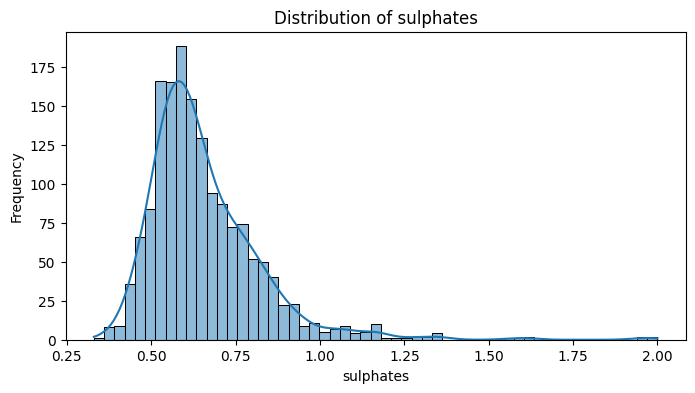

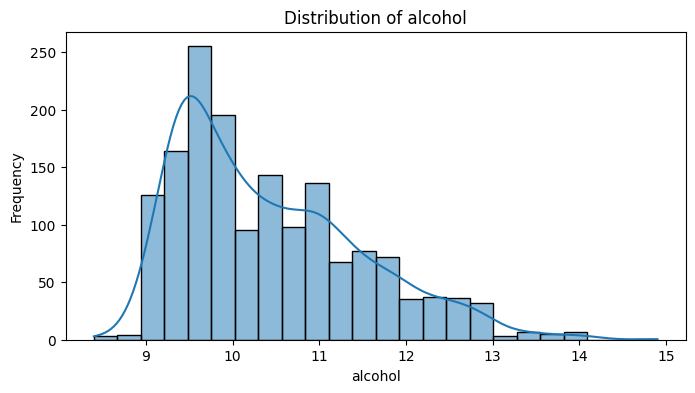

In [291]:
df_columns = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
]

for i in df_columns :

  plt.figure(figsize = (8,4))

  # Plot a histogram with KDE (Kernel Density Estimation)
  sns.histplot(df[i], kde = True)

  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')

  plt.show()

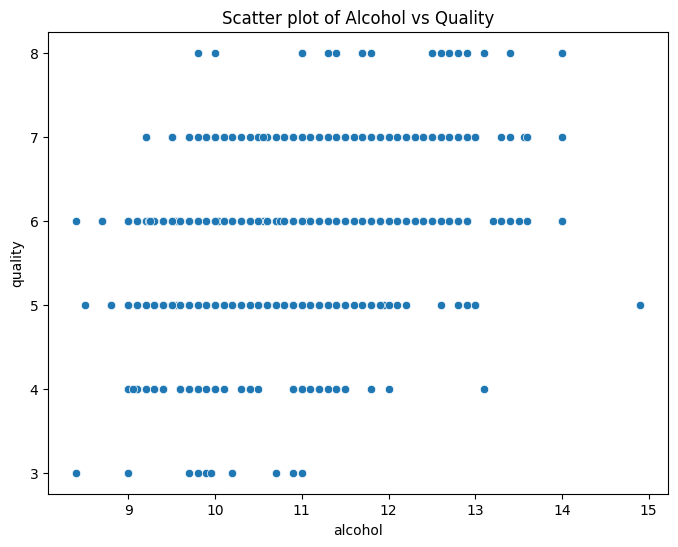

In [292]:
# Bivariate Analysis between Alcohol and Quality

plt.figure(figsize = (8,6))
sns.scatterplot(x = 'alcohol', y = 'quality', data = df)
plt.title('Scatter plot of Alcohol vs Quality')
plt.show()

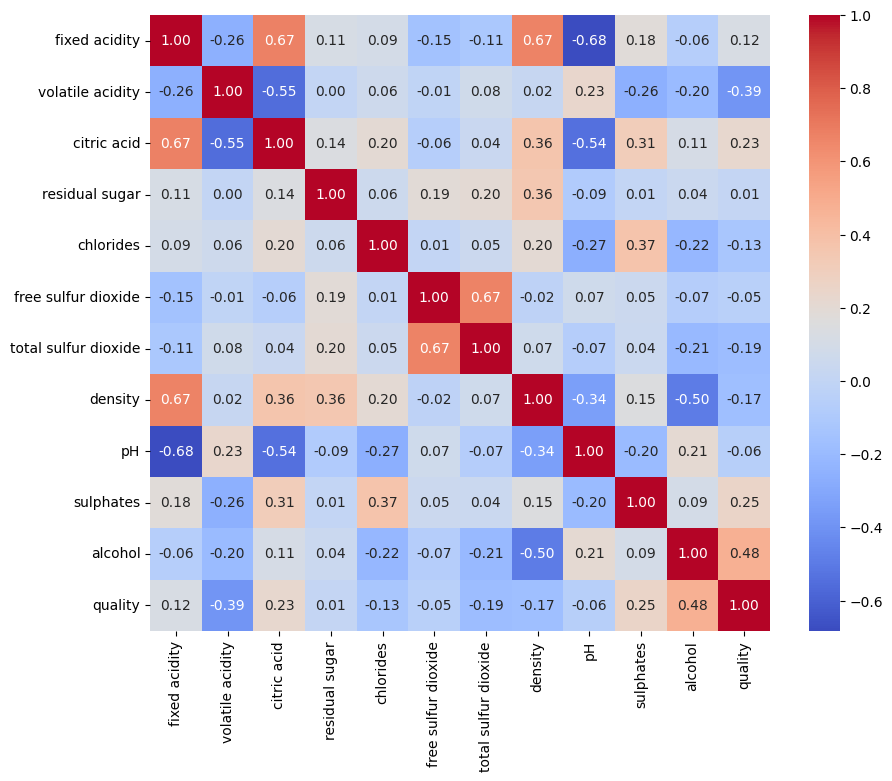

In [293]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt= ".2f")
plt.show()

Splitting Data

In [294]:
y = df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [295]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [296]:
x = df.drop(columns=['quality', 'sulphates'], axis = 1)

In [297]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,9.4


Scaling the Data

In [298]:
from sklearn.preprocessing import MinMaxScaler

In [299]:
scale = MinMaxScaler()

In [300]:
x_scaled = pd.DataFrame(scale.fit_transform(x), columns = x.columns)
x_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.153846


In [301]:
from sklearn.model_selection import train_test_split

In [302]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [303]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 10)
(320, 10)
(1279,)
(320,)


In [304]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model

In [305]:
model = DecisionTreeClassifier()

In [306]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [307]:
y_pred = model.predict(X_test)
y_pred

array([6, 4, 5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 6, 5, 7, 6, 6, 7, 5, 5, 6,
       5, 4, 4, 6, 6, 5, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 7, 5,
       7, 5, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 7, 6, 6, 5, 6, 7, 6, 7, 6, 5, 6, 5,
       7, 5, 6, 5, 5, 8, 5, 5, 4, 6, 6, 6, 6, 4, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 5, 7, 7, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 7, 6,
       4, 5, 5, 5, 7, 5, 5, 7, 5, 6, 4, 6, 7, 6, 6, 7, 5, 6, 6, 5, 5, 6,
       5, 7, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 8, 5, 5, 6, 6, 4, 6, 5, 6, 6,
       5, 6, 6, 6, 4, 5, 5, 7, 5, 5, 6, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       7, 7, 5, 7, 6, 6, 6, 5, 7, 5, 5, 6, 3, 5, 5, 4, 6, 6, 6, 6, 5, 7,
       5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 7, 4, 7, 7, 6, 7, 4, 5, 6, 5, 7,
       5, 7, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 8, 5,

In [308]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [309]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [310]:
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.59

Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 1  2  4  2  1  0]
 [ 0  4 85 36  4  1]
 [ 0  5 34 80 12  1]
 [ 0  1  1 16 22  2]
 [ 0  0  1  2  2  0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.20      0.18        10
           5       0.68      0.65      0.67       130
           6       0.58      0.61      0.59       132
           7       0.54      0.52      0.53        42
           8       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.59      0.59      0.59       320



In [311]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [312]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [313]:
# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Linear Regression Model:
Mean Squared Error (MSE): 0.41411622795802144
R-squared (R2): 0.36631596791790977


In [314]:
from sklearn.ensemble import RandomForestRegressor# Initialize and train the Random Forest Regressor model
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Random Forest Regressor Model:
Mean Squared Error (MSE): 0.295724375
R-squared (R2): 0.5474801476411781


In [315]:
from sklearn.ensemble import GradientBoostingRegressor

In [316]:
# Initialize and train the Gradient Boosting Regressor model
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Gradient Boosting Regressor Model:
Mean Squared Error (MSE): 0.38640887569392063
R-squared (R2): 0.40871398450279495


In [317]:
from sklearn.neural_network import MLPRegressor

In [318]:
mlp_regressor = MLPRegressor(random_state=42)
mlp_regressor.fit(X_train, y_train)

# Make predictions
y_pred = mlp_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Neural Network (MLPRegressor) Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Neural Network (MLPRegressor) Model:
Mean Squared Error (MSE): 0.4728045426612756
R-squared (R2): 0.27651062973871976


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [319]:
import tensorflow as tf


In [320]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


In [321]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 24.8795 - mse: 24.8795 - val_loss: 15.5090 - val_mse: 15.5090
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 5.8769 - mse: 5.8769 - val_loss: 1.0178 - val_mse: 1.0178
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 1.0471 - mse: 1.0471 - val_loss: 0.9869 - val_mse: 0.9869
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.9453 - mse: 0.9453 - val_loss: 0.8997 - val_mse: 0.8997
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8822 - mse: 0.8822 - val_loss: 0.8419 - val_mse: 0.8419
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8067 - mse: 0.8067 - val_loss: 0.7562 - val_mse: 0.7562
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.7394 - mse: 0.7394 - val_loss: 0.7054 - val_mse: 0.7054
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6919